In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Utils
# import lux
# import itertools

# DataViz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Notebook setup
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Schedule

### Exploratory Data Analysis
- Feature Engineering: discretizing and combining some variables.
- Univariate analysis
- Bivariate analysis

Let's keep an easy access to the data dictonary:

<img src="../images/data_dict.jpg" width="600" height="300">

### 0. Loading dataset and reviewing it

In [3]:
ccustomers = pd.read_csv('../data/customers_cleaned.csv') # ccustomers: cleaned customers 
ccustomers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [4]:
ccustomers.shape

(2236, 27)

Since we will be using `Dt_Customer` for Feature Engineering, let's check the type of the date with `dtypes`.

In [5]:
ccustomers['Dt_Customer'].dtypes

dtype('O')

As an `object` (pandas way to say `str`) we won't be able to perform date operations. We need to transform it into a `datetime` object.

In [15]:
# Transforming Dt_Customer variable into a python datetime object
ccustomers['Dt_Customer'] = pd.to_datetime(ccustomers['Dt_Customer'])

We are all set. Let's mix some data.

## 1. Feature Engineering

Looking back at the Data Dictionary we can list some operations that might result interesting:

- Transform `Year_Birth` in `Age`.

In order to get the customers' `Age` we need to investigate the day our data was sampled.  

In [29]:
ccustomers[ccustomers['Dt_Customer'] == ccustomers['Dt_Customer'].min()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1252,6653,1970,PhD,Married,55158.0,1,1,2012-07-30,72,293,0,87,4,11,23,4,7,2,5,7,0,0,0,0,0,0,1


In [39]:
import datetime

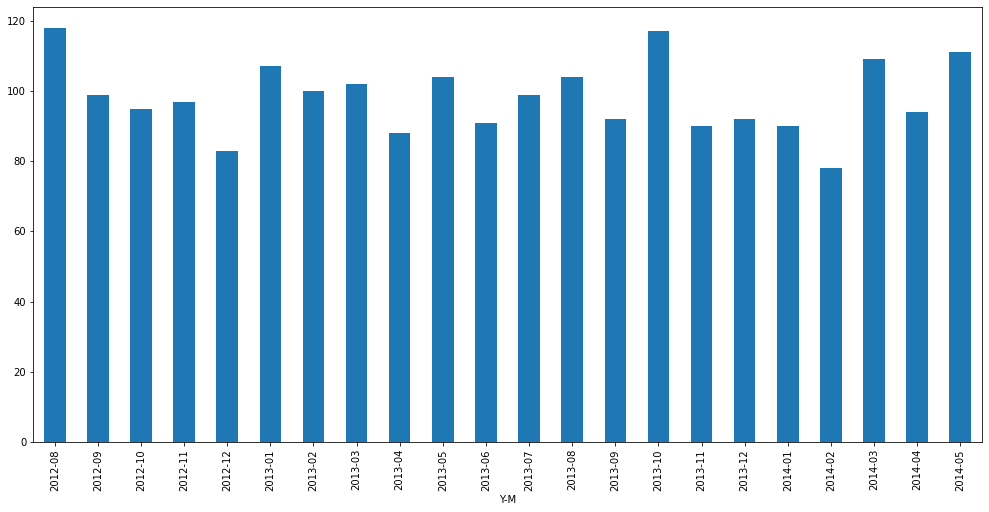

In [80]:
# Create dataset with features of interest
age_analysis = ccustomers[['Year_Birth', 'Dt_Customer', 'Recency']]

# Parse dates to Year-Month
age_analysis['Y-M'] = ccustomers['Dt_Customer'].dt.strftime('%Y-%m')

# Group data by Year-Month
age_analysis_grouped = age_analysis.groupby(by = 'Y-M').count()

# Plot Year-Month
plt.figure(figsize = (17, 8))
age_analysis_grouped.drop(['2012-07', '2014-06'])['Year_Birth'].plot(kind = 'bar');

In [ ]:
to_count = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for var in to_count:
    print(ccustomers[var].value_counts(), '\n================================ \n')

In [ ]:
purchase_flow = ccustomers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
purchase_flow['total'] = np.sum(ccustomers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']], axis = 1)
# np.sum(np.array(ccustomers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]), axis = 1)
ccustomers[purchase_flow['total'] == 5]

In [ ]:
ccustomers['Recency'].hist();

In [ ]:
ccustomers['Response'].value_counts()

In [ ]:
ccustomers[ccustomers['Response'] == 1]['Recency'].hist()
ccustomers[ccustomers['Response'] == 0]['Recency'].hist()